# MIT 2.29 Numerical Fluid Mechanics, Problem Set 1

MIT OCW Course [website](https://ocw.mit.edu/courses/mechanical-engineering/2-29-numerical-fluid-mechanics-spring-2015/index.htm)

## Problem 2


<img src='imgs/PS1_2_1.jpeg'>
<img src='imgs/PS1_2_2.jpeg'>

In [3]:
import numpy as np

In [4]:
def radd(a, b, n):
    def get_l(z, sz):
        if sz == 0:
            lz =-200
        else:
            lz = np.ceil(np.log10(sz*z*(1+10**(-(n+1)))))
        return lz
    
    def round_fn(z, sz):
        return sz * round((f * sz * z) / 10 ** lm)
    
    def should_reset(zt):
        return zt != 0 and np.log10(zt) >=n
    
    
    sa = np.sign(a)
    sb = np.sign(b)
    
    
    la = get_l(a, sa)
    lb = get_l(b, sb)
    lm = max(la, lb)
    
    f = 10**n
    
    at = round_fn(a, sa)
    bt = round_fn(b, sb)
    
    ireset = False
    if should_reset(at):
        la += 1
        ireset = True
        
    if should_reset(bt):
        lb +=1
        ireset = True
        
    if ireset:
        lm = max(la, lb)
        at = round_fn(a, sa)
        bt = round_fn(b, sb)
        
    ct = at + bt
    sc = np.sign(ct)
    
    if sc != 0:
        if np.log10(sc * ct) >= n:
            ct = round(ct / 10) * 10
    
    c = ct * 10**lm / f
    return c
        


In [5]:
def radd_vec(a, b, n):
    def get_l(z, sz):
        return np.where(
            sz == 0,
            -200,
            np.ceil(np.log10(sz*z*(1+10**(-(n+1)))))
        )
    
    def round_fn(z, sz):
        return sz * np.round((f * sz * z) / 10 ** lm)
    
    def should_reset(zt):
        return np.logical_and(zt != 0, np.log10(zt) >=n)
    
    
    sa = np.sign(a)
    sb = np.sign(b)
    
    
    la = get_l(a, sa)
    lb = get_l(b, sb)
    lm = np.maximum(la, lb)
    
    f = 10**n
    
    at = round_fn(a, sa)
    bt = round_fn(b, sb)
    
    
    ireset_a = should_reset(at)
    la = np.where(ireset_a, la + 1, la)
    
    ireset_b = should_reset(bt)
    lb = np.where(ireset_b, lb + 1, lb)
    
    ireset = np.logical_or(ireset_a, ireset_b)
        
    lm = np.where(ireset, np.maximum(la, lb), lm)
    at = np.where(ireset, round_fn(a, sa), at)
    bt = np.where(ireset, round_fn(b, sb), bt)
        
    ct = at + bt
    sc = np.sign(ct)
    
    ct = np.where(
        np.logical_and(sc!=0 , np.log10(sc * ct) >= n),
        np.round(ct / 10) * 10,
        ct
    )
    c = ct * 10**lm / f
    return c
        


In [6]:
for a, b in [(100, 4.9), (99.9, 4.9)]:
    for i in range(1, 4):
        print(f'radd({a},{b},{i}) = {radd(a, b, i)}')
    print()

radd(100,4.9,1) = 100.0
radd(100,4.9,2) = 100.0
radd(100,4.9,3) = 105.0

radd(99.9,4.9,1) = 100.0
radd(99.9,4.9,2) = 100.0
radd(99.9,4.9,3) = 105.0



In [7]:
radd_vec(np.stack([[100, 99.9]]), np.stack([[4.9]]), 3)

array([[105., 105.]])

In [8]:
a = 5
b = 4
N = 20
T1 = 90

x = np.linspace(0, a, 40)
y = np.linspace(0, b, 32)

def Txy_n(x, y, n, a, b, T1):
    pi = np.pi
    _2nm1 = 2*n - 1
    
    term1 = np.sin(_2nm1 * pi * x/a) / _2nm1
    term2 = np.sinh(_2nm1 * pi * y / a) / np.sinh(_2nm1 * pi * b / a)
    
    return term1 * term2


def Txy(x, y, N, a, b, T1, fwd=True):
    nvec = np.linspace(1, N, N+1)
    if not fwd:
        nvec = nvec[::-1]
    summation = Txy_n(x, y, nvec[0], a, b, T1)
    for n in nvec[1:]:
        summation = radd(summation, 
                         Txy_n(x, y, n, a, b, T1),
                        2)
    return summation

def Txy_vec(x, y, N, a, b, T1, fwd=True):
    nvec = np.linspace(1, N, N+1)
    if not fwd:
        nvec = nvec[::-1]
    summation = Txy_n(x, y, nvec[0], a, b, T1)
    for n in nvec[1:]:
        summation = radd_vec(summation, 
                         Txy_n(x, y, n, a, b, T1),
                        2)
    return summation

In [14]:
temp1 = np.zeros((len(y), len(x)))
temp2 = np.zeros((len(y), len(x)))

def find_temp(x, y, N, a, b, T1, fwd):

    t = np.zeros((len(y), len(x)))
    for idx_x, xi in enumerate(x):
        for idx_y, yi in enumerate(y):
            t[idx_y, idx_x] = Txy(xi, yi, N, a, b, T1, fwd=fwd)
    return t

temp1 = find_temp(x, y, N, a, b, T1, True)
temp2 = find_temp(x, y, N, a, b, T1, False)

/var/folders/vx/p2vsss_n7nl9_h99z877fz440000gn/T/ipykernel_34020/742531342.py:13: RuntimeWarning: invalid value encountered in log10
  return zt != 0 and np.log10(zt) >=n


In [15]:
temp1_vec = Txy_vec(x[None], y[:, None], N, a, b, T1, fwd=True)
temp2_vec = Txy_vec(x[None], y[:, None], N, a, b, T1, fwd=False)

/var/folders/vx/p2vsss_n7nl9_h99z877fz440000gn/T/ipykernel_34020/2915868501.py:6: RuntimeWarning: divide by zero encountered in log10
  np.ceil(np.log10(sz*z*(1+10**(-(n+1)))))
/var/folders/vx/p2vsss_n7nl9_h99z877fz440000gn/T/ipykernel_34020/2915868501.py:13: RuntimeWarning: divide by zero encountered in log10
  return np.logical_and(zt != 0, np.log10(zt) >=n)
/var/folders/vx/p2vsss_n7nl9_h99z877fz440000gn/T/ipykernel_34020/2915868501.py:13: RuntimeWarning: invalid value encountered in log10
  return np.logical_and(zt != 0, np.log10(zt) >=n)
/var/folders/vx/p2vsss_n7nl9_h99z877fz440000gn/T/ipykernel_34020/2915868501.py:46: RuntimeWarning: divide by zero encountered in log10
  np.logical_and(sc!=0 , np.log10(sc * ct) >= n),


In [19]:
(temp1 == temp1_vec).all(), (temp1 == temp2_vec).all(), temp1

(array([[ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        ...,
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True]]),
 array([[ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        ...,
        [ True,  True, False, ...,  True, False,  True],
        [ True,  True, False, ...,  True,  True, False],
        [ True, False, False, ..., False, False, False]]))

In [16]:
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator
import numpy as np


def plot_surfs(x, y, Z, figsize=(16, 16), cmap=cm.coolwarm):
    X, Y = np.meshgrid(x, y)
    fig, axes = plt.subplots(1, len(Z), figsize=figsize, subplot_kw={"projection": "3d"})
    
    if len(Z) == 1:
        axes = [axes]
    
    for axis, Zi in zip(axes, Z):

        # Plot the surface.
        surf = axis.plot_surface(X, Y, Zi, cmap=cmap,
                               linewidth=0, antialiased=True)

        # Customize the z axis.
        axis.set_zlim(Zi.min()*1.01, Zi.max()*1.01)
        axis.zaxis.set_major_locator(LinearLocator(10))
        # A StrMethodFormatter is used automatically
        axis.zaxis.set_major_formatter('{x:.02f}')

        # Add a color bar which maps values to colors.
        fig.colorbar(surf, aspect=20, shrink=0.2, ax=axis);

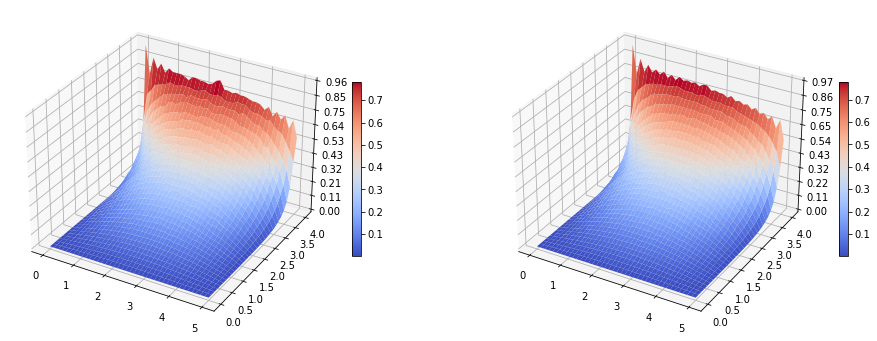

In [17]:
plot_surfs(x, y, [temp1_vec, temp2_vec])

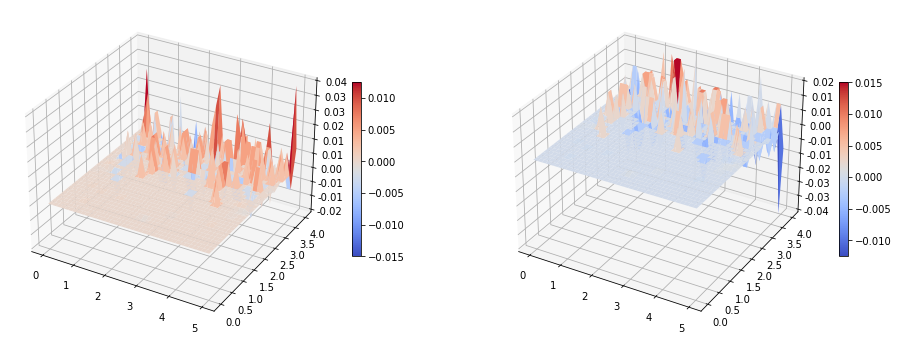

In [18]:
plot_surfs(x, y, [temp1_vec - temp2_vec, temp2_vec - temp1_vec])

In [ ]:
%timeit 